In [4]:
!pip install gudhi

Generando nube de puntos...


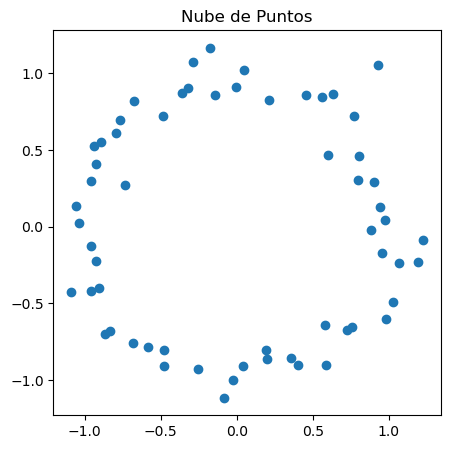

Calculando complejo simplicial...
Calculando homología persistente...
Generando Barcode...


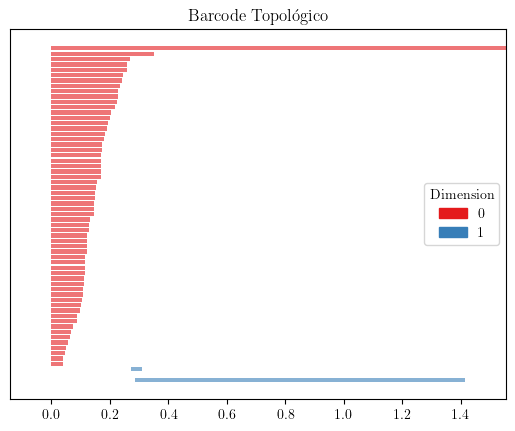

In [1]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt

# 1. GENERAR DATOS: Un círculo con "ruido" (imperfecciones)
print("Generando nube de puntos...")
t = np.linspace(0, 2*np.pi, 60)
# Coordenadas x, y con un poco de aleatoriedad (ruido)
x = np.cos(t) + np.random.normal(0, 0.1, 60)
y = np.sin(t) + np.random.normal(0, 0.1, 60)
point_cloud = np.column_stack((x, y))

# Visualizar los puntos primero para que veas qué analizamos
plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.title("Nube de Puntos")
plt.show()

# 2. CALCULAR TOPOLOGÍA (Rips Complex)
# Esto crea la "película" de bolas creciendo alrededor de los puntos
print("Calculando complejo simplicial...")
rips_complex = gudhi.RipsComplex(points=point_cloud)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# 3. CALCULAR PERSISTENCIA (H0 y H1)
print("Calculando homología persistente...")
diag = simplex_tree.persistence()

# 4. DIBUJAR EL RESULTADO (Barcode)
print("Generando Barcode...")
gudhi.plot_persistence_barcode(diag)
plt.title("Barcode Topológico")
plt.show()

Generando un 'Ocho' con ruido...


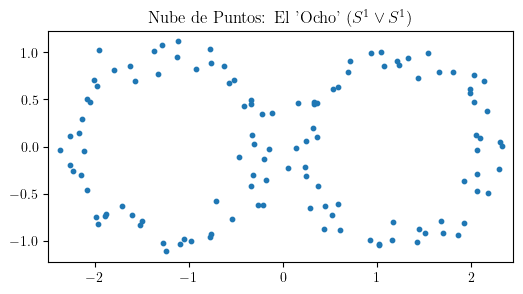

Calculando Homología Persistente...
Resultado Topológico:


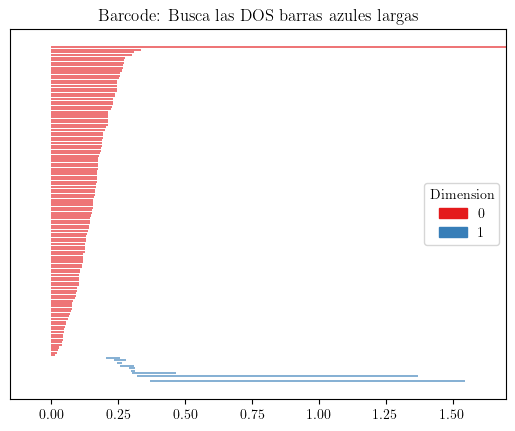

In [6]:
print("Generando un 'Ocho' con ruido...")

# 1. GENERAR DATOS: DOS CÍRCULOS DESPLAZADOS
# Círculo Izquierdo (centrado en x=-1.2)
t1 = np.linspace(0, 2*np.pi, 60)
x1 = np.cos(t1) - 1.2
y1 = np.sin(t1)
c1 = np.column_stack((x1, y1))

# Círculo Derecho (centrado en x=+1.2)
t2 = np.linspace(0, 2*np.pi, 60)
x2 = np.cos(t2) + 1.2
y2 = np.sin(t2)
c2 = np.column_stack((x2, y2))

# Unimos los dos círculos y añadimos ruido
point_cloud = np.vstack((c1, c2))
noise = np.random.normal(0, 0.1, point_cloud.shape) # Ruido Gaussiano
point_cloud = point_cloud + noise

# Visualizar la nube de puntos
plt.figure(figsize=(6,3))
plt.scatter(point_cloud[:,0], point_cloud[:,1], s=10)
plt.title("Nube de Puntos: El 'Ocho' ($S^1 \\vee S^1$)")
plt.axis('equal')
plt.show()

# 2. CALCULAR TOPOLOGÍA
print("Calculando Homología Persistente...")
rips_complex = gudhi.RipsComplex(points=point_cloud)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()

# 3. DIBUJAR BARCODE
print("Resultado Topológico:")
gudhi.plot_persistence_barcode(diag)
plt.title("Barcode: Busca las DOS barras azules largas")
plt.show()

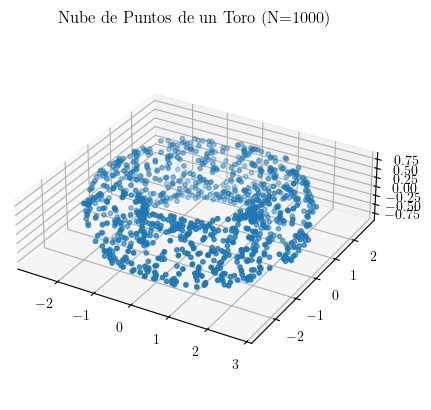

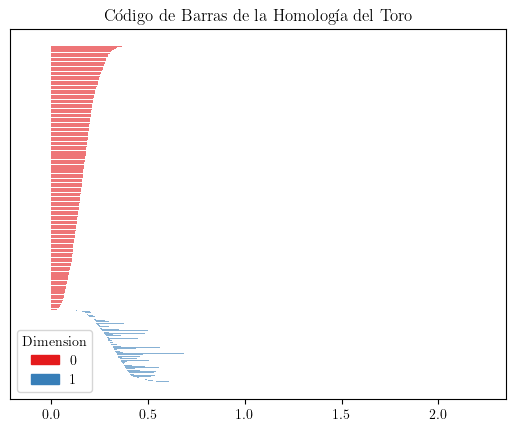

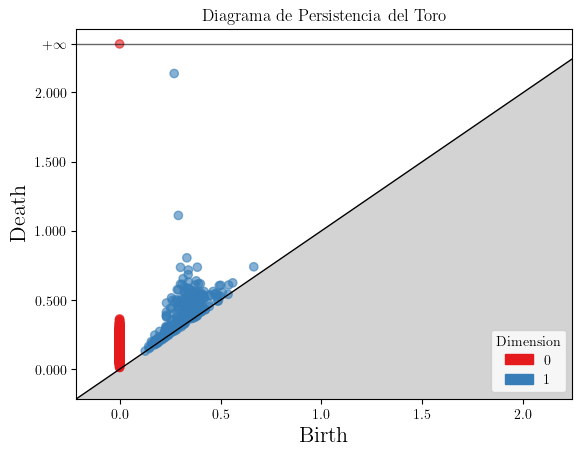

In [2]:
import gudhi
import numpy as np
import matplotlib.pyplot as plt

# La "Forma" de un Toro
# 
# En topología, la "forma" de un toro se caracteriza por sus números de Betti (sus "agujeros" en distintas dimensiones):
# 
# * **B_0 = 1** (Es 1 componente conexa).
# * **B_1 = 2** (Tiene 2 ciclos o "agujeros" 1D: el del centro y el que rodea el "tubo").
# * **B_2 = 1** (El hueco interior 2D).
# 
# Generamos 1000 puntos de un toro en 3D para ver si TDA puede encontrar esta firma (1, 2) (El último se omitirá por falta de recursos).

# Generamos 1000 puntos
n_samples = 1000
R = 2.0  # Radio mayor
r = 0.7  # Radio menor

# Muestreamos dos ángulos, theta y phi
theta = np.random.uniform(0, 2 * np.pi, n_samples)
phi = np.random.uniform(0, 2 * np.pi, n_samples)

# Ecuaciones paramétricas
x = (R + r * np.cos(theta)) * np.cos(phi)
y = (R + r * np.cos(theta)) * np.sin(phi)
z = r * np.sin(theta)

# Combinamos en una nube de puntos (y añadimos algo de ruido)
points = np.stack([x, y, z], axis=1)
points += 0.05 * np.random.randn(*points.shape) # Ruido gaussiano

# Visualizamos la nube de puntos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10) # s=10 para puntos más grandes
plt.title(f"Nube de Puntos de un Toro (N={n_samples})")
ax.set_aspect('equal')
plt.show()

# Para analizar la "forma", usamos un `RipsComplex`.
# Esto funciona "engordando" cada punto. A medida que el radio (epsilon) crece, los puntos se conectan en aristas, luego en triángulos (caras 2D), etc., creando una "filtración" de complejos simpliciales. `gudhi` rastrea qué "agujeros" (ciclos) nacen y mueren durante este proceso.

rips_complex = gudhi.RipsComplex(points=points)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

# El resultado es una lista de "vidas" de características topológicas. El "código de barras" es la visualización estándar.
# * Las líneas cortas son "ruido" (agujeros que aparecen y se tapan casi al instante).
# * Las líneas **largas** son la "señal" (la topología real del objeto, los agujeros que *persisten*).


# Visualización de los resultados
gudhi.plot_persistence_barcode(persistence, legend=True)
plt.title("Código de Barras de la Homología del Toro")
plt.show()

gudhi.plot_persistence_diagram(persistence, legend=True)
plt.title("Diagrama de Persistencia del Toro")
plt.show()

# ## 4. Análisis (B_0 y B_1)
# 
# El resultado es consistente con la teoría para las dimensiones que hemos calculado.
# 
# * **Dim 0 (Azul):** Una sola línea larga. Esto es **B_0 = 1**. El algoritmo identifica la única componente conexa.
# 
# * **Dim 1 (Naranja):** Se observan **dos (2)** líneas naranjas largas (persistentes). Esto es **B_1 = 2**. Ha identificado los dos ciclos fundamentales del toro.
# 
# (No hemos calculado la Dimensión 2 (B_2) porque es computacionalmente muy costosa, pero para una introducción, B_0 y B_1 son la demostración principal).